# Factors that contribute to National Happiness
The goal of this analysis is to determine the factors that correlate to national happiness. I retreived this data from Kaggle.
I am going to download the data set. Retrieve it, clean it and see if I can find a correlation between various factors -like income for instance- and happiness.

## Downloading the Dataset


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

In [ ]:
dataset_url = 'https://www.kaggle.com/unsdsn/world-happiness'

In [ ]:
import opendatasets as od 
od.download(dataset_url)

The dataset has been downloaded and extracted.

In [ ]:
pwd

'/home/jovyan'

In [ ]:
 data_dir = './world-happiness' 

In [ ]:
import os
os.listdir(data_dir)

['2018.csv', '2015.csv', '2017.csv', '2019.csv', '2016.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "project-happiness"

In [ ]:
import pandas as pd
happy_raw_df = pd.read_csv('world-happiness/2019.csv')
happy_raw_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


# This dataset represents happiness rankings among countries 
**Question**: How are countries ranked by happiness?

**Methodology**: A method called a Cantril ladder is being used here. The way it works is that it asks respondents to rate their own current lives on a scale of 10 to 0, with the best possible life being 10 and the worst possible life being 0. The countries are then ranked in descending order based on the average score. 

**Metrics**: The columns after the happiness score are factors that estimate how much each variable contribute to the overall score for
that particular country compared to a hypothetical country that has the lowest score in each of the 6 factors. In other words, it tells you how much do each of these six factors are positively impacting the the average happiness score in each country.

In [ ]:
happy_raw_df.shape

(156, 9)

In [ ]:
happy_raw_df.isnull().values.any()

False

#### Note: I will rename 'Perceptions of corruption' as 'Absence of Corruption' since that is what it is referred to as in the kaggle description. Additionally, it can clear up confusion as a higher score actually means that the public perceive there to be less corruption and that is contributing to the happiness score; additionally I will rename the score as happiness to make it more clear

In [ ]:
happy_raw_df.rename(columns= {'Perceptions of corruption': 'Absence of Corruption', 'Score':'Happiness'}, inplace= True)

happy_raw_df

,Overall rank,Country or region,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### Let us find the max and min of each column to see if there are any data value too high or low to make sense. For example, negative values or a metric score that is higher than the overall score

In [ ]:
happy_raw_df.max(axis= 0)   #the highest value of each column

Overall rank                         156
Country or region               Zimbabwe
Happiness                          7.769
GDP per capita                     1.684
Social support                     1.624
Healthy life expectancy            1.141
Freedom to make life choices       0.631
Generosity                         0.566
Absence of Corruption              0.453
dtype: object

In [ ]:
happy_raw_df.min(axis= 0)    #the lowest value of each column

Overall rank                              1
Country or region               Afghanistan
Happiness                             2.853
GDP per capita                          0.0
Social support                          0.0
Healthy life expectancy                 0.0
Freedom to make life choices            0.0
Generosity                              0.0
Absence of Corruption                   0.0
dtype: object

#### Note: for the min, the zeros mean that in each column, there is at lease one country where a certain metric contributes nothing to the overall happiness score of a country

In [ ]:
happy_raw_df.describe() #the descriptive statistics of the dataset

,Overall rank,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
zero_metric = happy_raw_df[(happy_raw_df['GDP per capita'] == 0)|
                           (happy_raw_df['Social support'] == 0)|
                           (happy_raw_df['Healthy life expectancy'] == 0)|
                           (happy_raw_df['Freedom to make life choices'] == 0)|
                           (happy_raw_df['Generosity'] == 0)|
                           (happy_raw_df['Absence of Corruption'] == 0)]
zero_metric

,Overall rank,Country or region,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
70,71,Moldova,5.529,0.685,1.328,0.739,0.245,0.181,0.000
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### It's very unlikely that any metric contributes nothing to the overall score. Zero values can be explained by standard deviation since the actual numbers can be a little higher or lower. For this reason, I will turn all 0.00 values to NaN to make the dataset slighty more accurate.

In [ ]:
happy_df = happy_raw_df.replace(to_replace= 0, value= np.nan) #replace all zeros in the dataframe with NaN
happy_df.describe()

,Overall rank,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.500000,5.407096,0.910987,1.216613,0.729923,0.395103,0.186039,0.111316
std,45.177428,1.113120,0.392925,0.283808,0.235727,0.140207,0.094388,0.094422
min,1.000000,2.853000,0.026000,0.378000,0.105000,0.010000,0.025000,0.004000
25%,39.750000,4.544500,0.615000,1.057000,0.553000,0.310000,0.109500,0.048500
50%,78.500000,5.379500,0.960000,1.274000,0.789000,0.417000,0.178000,0.086000
75%,117.250000,6.184500,1.234000,1.453000,0.882500,0.507500,0.249500,0.141500
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### There are no longer zeroes in the minimum row

# Question 1: Many people believe that the GDP per capita of a country is the main contributing factor to overall well being. How true is this? 

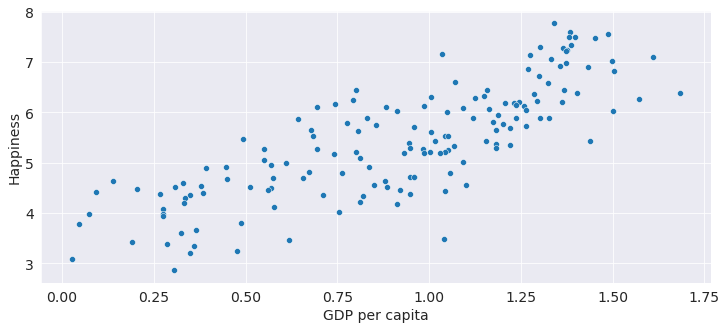

In [ ]:
sns.scatterplot(x=happy_df['GDP per capita'] ,y= happy_df['Happiness']);

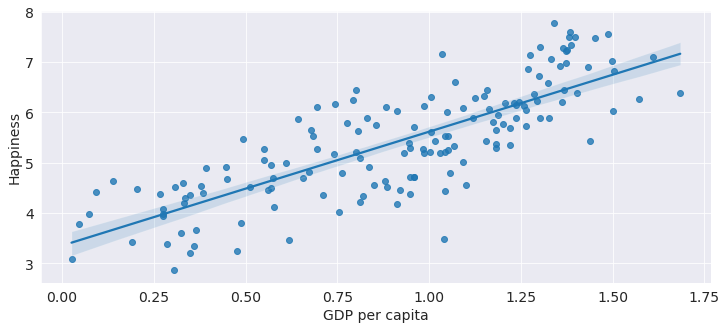

In [ ]:
sns.regplot(x=happy_df['GDP per capita'] ,y= happy_df['Happiness']);

### Let us apply the Pearson's correlation coefficient to determine which variables are strongly correlated with each other.

### However before we apply the correlation coefficient we must first make sure that the data nomially distributed if I want to use Pearson's coefficient

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


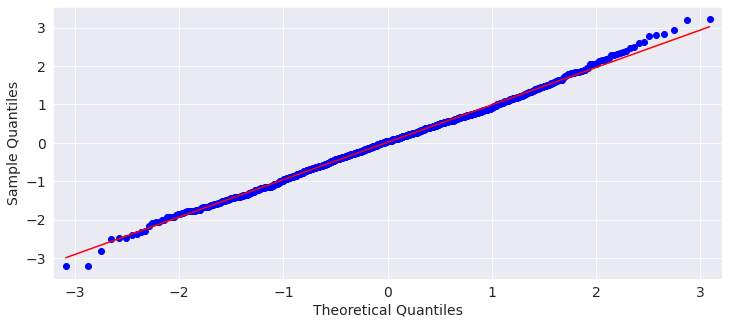

In [ ]:
sm.qqplot(np.random.normal(0,1, 1000), line ='s');

## The quantiles of the input array is plotted against the quantile of a theoretical normal distribution to see whether the input array is normally distributed

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


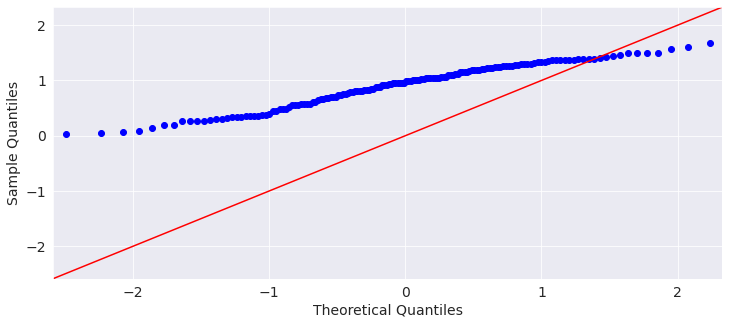

In [ ]:
sm.qqplot(happy_df['GDP per capita'], line ='45');

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


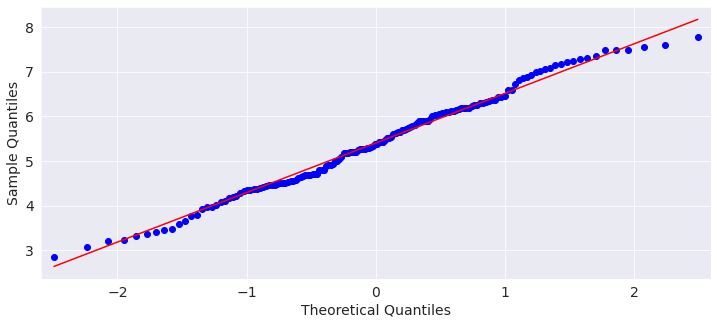

In [ ]:
sm.qqplot(happy_df['Happiness'], line ='s'); #happiness metric is a normal distribution

### Since both variables have to be normally distributed. Using Pearson's correlation coefficient is not appropriate. Instead I should use Spearman's correlation coefficient since that does not require both variables to be normally distributed.

In [ ]:
corr_spearman = happy_df.corr(method = 'spearman') #apply spearman's correlation coefficient to the dataframe
corr_spearman

,Overall rank,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
Overall rank,1.000000,-0.999999,-0.815454,-0.812565,-0.805284,-0.543359,-0.071118,-0.221746
Happiness,-0.999999,1.000000,0.815508,0.812622,0.805280,0.543319,0.071116,0.221857
GDP per capita,-0.815454,0.815508,1.000000,0.760059,0.852858,0.406174,-0.030124,0.236594
Social support,-0.812565,0.812622,0.760059,1.000000,0.721248,0.431488,0.008369,0.108924
Healthy life expectancy,-0.805284,0.805280,0.852858,0.721248,1.000000,0.399853,-0.009555,0.174115
Freedom to make life choices,-0.543359,0.543319,0.406174,0.431488,0.399853,1.000000,0.313809,0.387857
Generosity,-0.071118,0.071116,-0.030124,0.008369,-0.009555,0.313809,1.000000,0.281582
Absence of Corruption,-0.221746,0.221857,0.236594,0.108924,0.174115,0.387857,0.281582,1.000000


### The correlation value between gdp per capita and happiness is a strong one at approximately p = 0.82. This confirms the relationship we see in the scatter graph is valid

### For reference, a distribution of 0.8-1.0 is strong while 0.5-0.79 is moderate. Anything below 0.5 is a weak correlation.

# Question 2: Which metric overall contribute the most to the happiness score of a nation on average?

In [ ]:
happy_df

,Overall rank,Country or region,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,NaN,0.158,0.025
154,155,Central African Republic,3.083,0.026,NaN,0.105,0.225,0.235,0.035


In [ ]:
happy_df.describe()

,Overall rank,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.500000,5.407096,0.910987,1.216613,0.729923,0.395103,0.186039,0.111316
std,45.177428,1.113120,0.392925,0.283808,0.235727,0.140207,0.094388,0.094422
min,1.000000,2.853000,0.026000,0.378000,0.105000,0.010000,0.025000,0.004000
25%,39.750000,4.544500,0.615000,1.057000,0.553000,0.310000,0.109500,0.048500
50%,78.500000,5.379500,0.960000,1.274000,0.789000,0.417000,0.178000,0.086000
75%,117.250000,6.184500,1.234000,1.453000,0.882500,0.507500,0.249500,0.141500
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


## It seems that on average(mean) social support contribute most to well being. Let us take a look at it in more detail

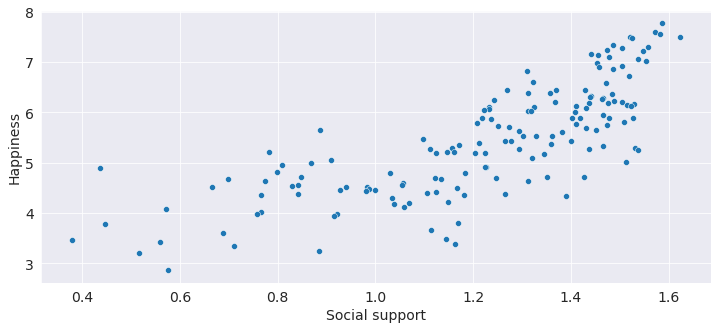

In [ ]:
sns.scatterplot(x=happy_df['Social support'] ,y= happy_df['Happiness']); #scatter plot

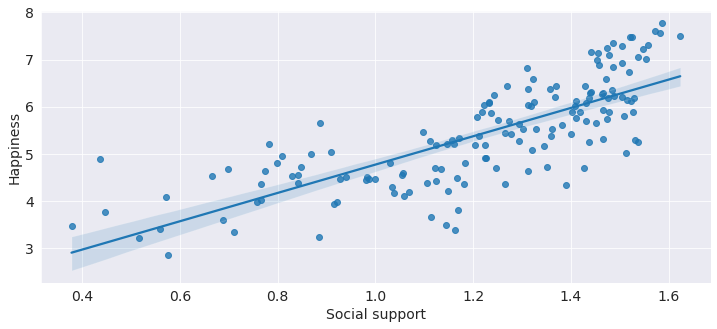

In [ ]:
sns.regplot(x=happy_df['Social support'] ,y= happy_df['Happiness']); #best fit line

In [ ]:
corr_spearman

,Overall rank,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
Overall rank,1.000000,-0.999999,-0.815454,-0.812565,-0.805284,-0.543359,-0.071118,-0.221746
Happiness,-0.999999,1.000000,0.815508,0.812622,0.805280,0.543319,0.071116,0.221857
GDP per capita,-0.815454,0.815508,1.000000,0.760059,0.852858,0.406174,-0.030124,0.236594
Social support,-0.812565,0.812622,0.760059,1.000000,0.721248,0.431488,0.008369,0.108924
Healthy life expectancy,-0.805284,0.805280,0.852858,0.721248,1.000000,0.399853,-0.009555,0.174115
Freedom to make life choices,-0.543359,0.543319,0.406174,0.431488,0.399853,1.000000,0.313809,0.387857
Generosity,-0.071118,0.071116,-0.030124,0.008369,-0.009555,0.313809,1.000000,0.281582
Absence of Corruption,-0.221746,0.221857,0.236594,0.108924,0.174115,0.387857,0.281582,1.000000


## At p= 0.81 there is strong correlation. From this we know that social support has a strong affect on happiness.

## Even though social support contributes most of well being, it has the same correlation or lower compared to the gdp per capita. The reason this maybe the case is because social support is more consistantly higher.

In [ ]:
happy_df.describe()

,Overall rank,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.500000,5.407096,0.910987,1.216613,0.729923,0.395103,0.186039,0.111316
std,45.177428,1.113120,0.392925,0.283808,0.235727,0.140207,0.094388,0.094422
min,1.000000,2.853000,0.026000,0.378000,0.105000,0.010000,0.025000,0.004000
25%,39.750000,4.544500,0.615000,1.057000,0.553000,0.310000,0.109500,0.048500
50%,78.500000,5.379500,0.960000,1.274000,0.789000,0.417000,0.178000,0.086000
75%,117.250000,6.184500,1.234000,1.453000,0.882500,0.507500,0.249500,0.141500
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### From this we can see that the lowest value for social support is 0.38 but for gdp per capita it is 0.026

# Question 3: Specifically how does the United States fare compared to the world average?

In [ ]:
us_filt = happy_df[happy_raw_df['Country or region'] == 'United States'] 
us_filt = us_filt.iloc[:,[2,3,4,5,6,7,8]]
us_filt['Region'] = 'United States' 
cols = us_filt.columns.tolist()
cols = cols[-1:] + cols[:-1] 

us_filt = us_filt[cols]

In [ ]:
us_filt

,Region,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
18,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128


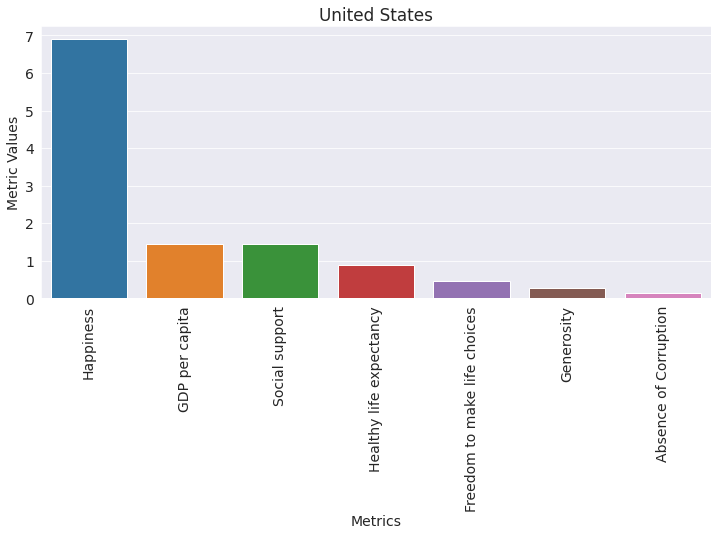

In [ ]:
plt.xticks(rotation=90)
plt.title('United States')
plt.xlabel('Metrics')
plt.ylabel('Metric Values')
sns.barplot(data = us_filt);

## This is a barplot showing the distribution of metrics for the US. It seems that GDP per capita, social Support, and life expectancy matter most to well being. While absence of corruption does very little. How does this compare to other nations?

In [ ]:
#calculate the mean of all columns assign each value to a variable
global_score = happy_df['Happiness'].mean(axis = 0)
global_gdp = happy_df['GDP per capita'].mean(axis= 0)
global_social = happy_df['Social support'].mean(axis= 0)
global_health = happy_df['Healthy life expectancy'].mean(axis= 0)
global_freedom = happy_df['Freedom to make life choices'].mean(axis= 0)
global_generosity =  happy_df['Generosity'].mean(axis= 0)
global_corruption = happy_df['Absence of Corruption'].mean(axis= 0)

#and create a dictionary with keys and values
data = {'Happiness':[global_score], 
        'GDP per capita': [global_gdp], 
        'Social support': [global_social],
        'Healthy life expectancy': [global_health],
        'Freedom to make life choices': [global_freedom],
        'Generosity': [global_generosity],
        'Absence of Corruption': [global_corruption]}

#a new dataframe of the created dictionary
global_filt = pd.DataFrame(data=data)
global_filt.insert(0,'Region','Global')  
#insert the column 'region' with string 'global' to indicate the average of all countries for this dataframe
global_filt

us_world_compare_df = pd.concat([global_filt,us_filt]) #combine the global and us dataframes together to create a new dataframe

us_world_compare_df
#I cannot utilize current short form of the combined dataframe shown below

,Region,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
0,Global,5.407096,0.910987,1.216613,0.729923,0.395103,0.186039,0.111316
18,United States,6.892000,1.433000,1.457000,0.874000,0.454000,0.280000,0.128000


In [ ]:
#I must first convert the short-form dataframe to a long-form dataframe so I can create a barplot for it
us_world_compare_longform_df = pd.melt(frame = us_world_compare_df, id_vars= 'Region', var_name= 'Metrics', value_name= "Values" )
us_world_compare_longform_df

,Region,Metrics,Values
0,Global,Happiness,5.407096
1,United States,Happiness,6.892000
2,Global,GDP per capita,0.910987
3,United States,GDP per capita,1.433000
4,Global,Social support,1.216613
5,United States,Social support,1.457000
6,Global,Healthy life expectancy,0.729923
7,United States,Healthy life expectancy,0.874000
8,Global,Freedom to make life choices,0.395103
9,United States,Freedom to make life choices,0.454000


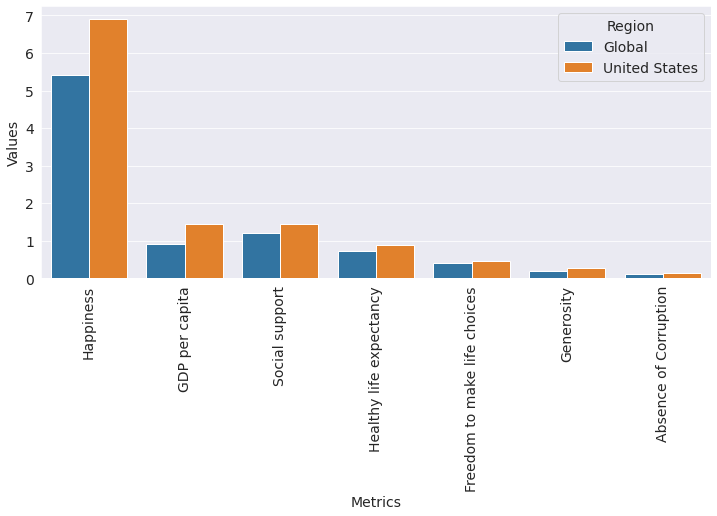

In [ ]:
plt.xticks(rotation=90) #90 degree ticks
sns.barplot(data = us_world_compare_longform_df, x= 'Metrics', y= 'Values', hue = 'Region');
#barplot comparing the metrics of the US versus the global average

### We can infer several conclusions from the data. Firstly, on average Americans are happier than the rest of the world

### Additionally, we see that compared to the world average, all metrics with the exception of corruption contribute more to the happiness of Americans especially GDP per capita, but also social support and life expectancy to a lesser extent. This suggest that the US should focus on economic productivity, personal relationships, and perhaps a better healthcare system to maximize well being.

### Life expectancy is related to happiness however this is probably an indirect correlation as living longer does not necessarily mean that life is more furfilling. Instead there is probably a confounding variable that influences both life expectency and well being. Could that be gdp per capita? Is gdp per capita correlated with life expectency?

# Question 4: Is gdp per capita correlated with life expectency?

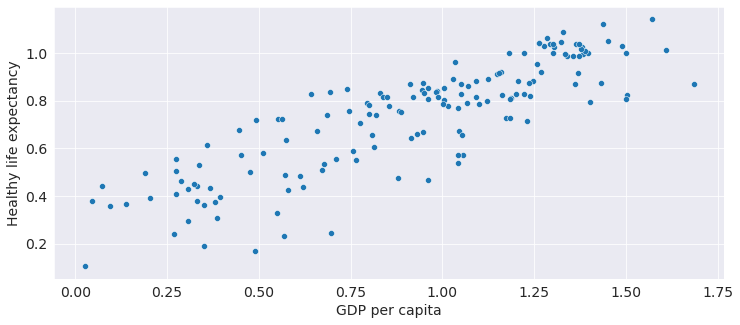

In [ ]:
sns.scatterplot(x=happy_df['GDP per capita'] ,y= happy_df['Healthy life expectancy']);

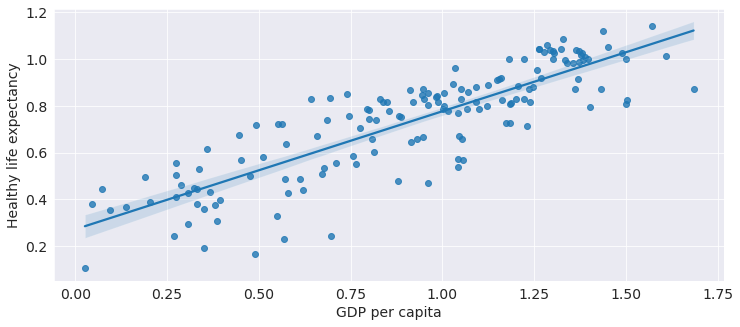

In [ ]:
sns.regplot(x=happy_df['GDP per capita'] ,y= happy_df['Healthy life expectancy']);

In [ ]:
corr_spearman

,Overall rank,Happiness,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Absence of Corruption
Overall rank,1.000000,-0.999999,-0.815454,-0.812565,-0.805284,-0.543359,-0.071118,-0.221746
Happiness,-0.999999,1.000000,0.815508,0.812622,0.805280,0.543319,0.071116,0.221857
GDP per capita,-0.815454,0.815508,1.000000,0.760059,0.852858,0.406174,-0.030124,0.236594
Social support,-0.812565,0.812622,0.760059,1.000000,0.721248,0.431488,0.008369,0.108924
Healthy life expectancy,-0.805284,0.805280,0.852858,0.721248,1.000000,0.399853,-0.009555,0.174115
Freedom to make life choices,-0.543359,0.543319,0.406174,0.431488,0.399853,1.000000,0.313809,0.387857
Generosity,-0.071118,0.071116,-0.030124,0.008369,-0.009555,0.313809,1.000000,0.281582
Absence of Corruption,-0.221746,0.221857,0.236594,0.108924,0.174115,0.387857,0.281582,1.000000


### At a coefficient of p= 0.85, it appears that GDP per capita is an even stronger predictor of life expectancy than it is a predictor of happiness

# Question 5: What other relationships can we predict from the data?

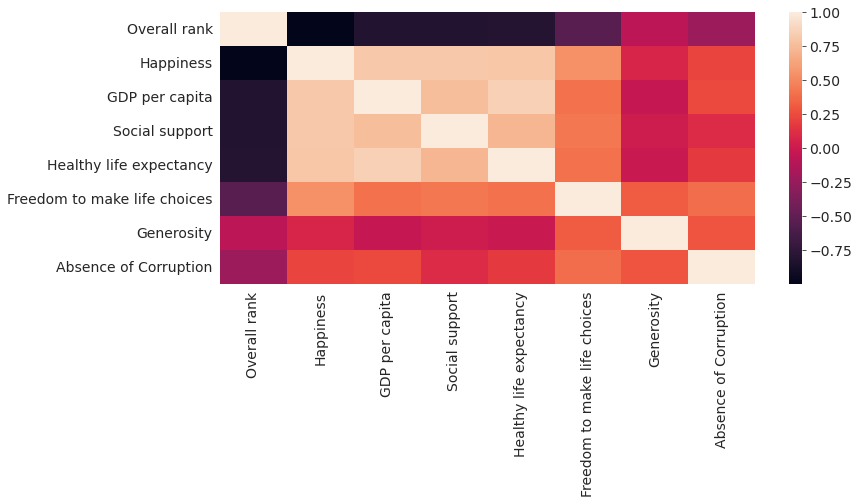

In [ ]:
sns.heatmap(corr_spearman)
plt.show()

### Interestingly, gdp per capita has an even stronger correlation with health than happiness

### Freedom, generosity, and absence of corruption is not strongly correlated with happiness or any other metric. They seem to be independent variables. Therefore they are not important to well being. It least for most countries.

### That being said. The relationship between happiness and freedom is not insignificant. Countries may gain a small boost to happiness by creating a more free society. 

### Given that the social support is not something that a government can control and gdp per capita influences health, it suggest that govenments should do all it can to increase the collective wealth of a society in term of gdp per person

#  Inferences and Conclusion

### GDP per capita is most strongly correlated with well being. Social support contribute the most to the happiness score of a nation on average. Social support contribution to happiness is consistantly higher compared to gdp per capita. More consistantly higher social support value across the board may explain why it contributes the most to well being even though social support is not the most strongly correlated with well being. I've used Spearman's Correlation because not all the metrics are normally distributed which is required for pearson's correlation. The US score higher than the rest of the world on all metrics except absence of corruption. Therefore corruption has no or very little affect on well being for the US as well as the rest of the world. Life expectancy is correlated to happiness but it might be a result of gdp per capita. While, not strong. Freedom does have a significant affect on happiness.

### Resources:
#### - https://seaborn.pydata.org/
#### - https://pandas.pydata.org/docs/
#### - https://towardsdatascience.com/
#### - https://stackoverflow.com/
#### - https://matplotlib.org/
#### - https://numpy.org/
#### - https://datatofish.com/
#### - https://kaggle.com/

